# The Wisdom of the Crowd: An Analysis of the 2019 Most Talked Topics about Python in StackOverflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors
import seaborn as sns
import nltk
from math import pi
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
import pickle

from IPython.display import HTML, display
import pprint

import warnings
warnings.filterwarnings('ignore')

import plotly.io as pio
pio.renderers.default='notebook'


In [2]:
# Create toggle cell button
font = "Roboto-Regular.ttf"
pp = pprint.PrettyPrinter(indent=4, width=100)


HTML('''
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

.output {
    display: flex;
    align-items: left;
    text-align: justify;
}

</style>


<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>
''')


## Executive Summary


Unbeknownst to many, Python is not a young programming language. Guido Van Rossum created Python in the late 1980s, almost three decades ago, as a general purpose programming language [1]. It can be attributed to this very reason as to why Python rose to fame in recent years. Programming is slowly becoming a democratized skill with more people learning how to code each day. Python, with its beginner friendly syntax has been useful for a wide array of applications and has continuously prospered and evolved throughout the years with algorithmic breakthroughs and innovations through Python becoming public year by year. 

As more people from diverse backgrounds enter into programming through Python, the vast number of questions and ideas have been well documented in the archives of StackOverflow as seasoned programmers and newly integrated learners crowd towards the platform in search of answers to their programming impediments. In this analysis, our objective is to identify the core topics of Python-related questions found within the 2019 archives of StackOverflow and quantify how members of the StackOverflow community have engaged with each core topic. Whereas from our findings, we wish to emphasize less frequented topics to the StackOverflow community in the hopes of attracting more attention to these topics.

As a scope of our study, we look into the most recent themes of questions from 2019 collated within the platform. Specifically, we look into topics involving Python programming and performed dimensionality reduction techniques and a two-step clustering algorithm to identify the core topics among the thousand of posts recorded within the archives of StackOverflow. A total of 12,876 unique tags were obtained out of a total of over 800,000 Python related posts. 

Our initial EDA shows that the Python community has continously grown over the past decade where from an initial point of reference of Python questions back in 2010, we can see an 800% increase in the total number of posts from 2010 to 2019. Along with the increase in the total number of questions regarding Python Programming, the diversity of topics discussed has seen a large increase as well from less than 4,800 unique tags in 2010 to approximately 12,900 unique tags in 2019. As the number of topics continuously diversifies through time, it is expected that some topics would have higher engagements in contrast to others. 

Through our analysis of the topics discussed in 2019, we have found that a majority of inquiries related to Python are clustered into four distinct groups : The Artificial Intelligence (AI) Cluster, the Web Scraping Cluster, the General Applications Cluster, and the Data Processing Cluster. 

By looking at the community engagement metrics (Post Counts, View Counts, Comment Counts, Favorite Counts, and Answer Counts) of each of these clusters, we had derived a high-level overview of how much the Python community interacts with each of these topics. From our findings, we saw that the AI cluster was the most frequented topic in terms of views and number of favorited posts however it was noticeable that it had the least number of comments and answers with a minimal number of posts as well. In contrast, the General Applications cluster showcased the highest amount of posts as well the highest number of comments which is as expected as this cluster contains ~70% of the posts included in this study. The Data Processing cluster, on the other hand, showcased the most number of answers although it had the least amount of views among the clusters. Lastly, the Web Scraping cluster showed a healthy engagement with respect to the total number of posts, number of views, number of comments, and number of answers, although it had the lowest number of favorited posts.

For further improvements to this study, our group recommends the investigation of how these topics had diversified throughout time by analyzing how these topics branched out from each other as the Python language grew through time. We also recommend the analysis of more granular clusters and alternative clustering techniques that may result to additional insights that may assist the platform. Lastly, we recommend an extension of the study such that the title of the post as well as its supporting contents be included into the analysis. 

## Problem Statement

StackOverflow, in recent years, has become the preferred site for veteran programmers and new coders for programming-related questions [2]. Over the years, it has served as a site where programmers at various stages of their careers gather to ask, explore, and guide their fellow programmers in their algorithmic endeavours. With programming becoming more accessible and simpler to learn, more people are attracted towards StackOverflow either through sheer curiosity, to ask for help, or maybe even to lend a helping hand. 

With languages such as Python paving the way for more readable code as well as its sheer ability to foster open-collaboration between its users, people have begun to diversify their questions surrounding the idea of Python programming along with its related topics. However as the application of Python programming continously diversifies, some topics have begun to overshadow other topics. Community engagement is one of the key traits of how an issue can be resolved within public forum websites such as StackOverlow. However with little knowledge on which topics require more emphasis, members of the community have no idea that certain interventions should be made. In this study, our group wants to identify key topics discussed in StackOverflow and identify the gaps in the supply and demand of information to be able to recommend possible interventions that may be done to assist the platform.

## Methodology

![methodology.png](methodology.png)

1. **Data collection** - Data was obtained by parsing the line number, date, title, tags, as well as varying count metrics such as view counts, favorite counts, comment counts, and answer counts from '/mnt/data/public/stackexchange/Posts.xml and saved as a csv file with filename ***stackexchange_data.csv***.
2. **Data processing** *(refer to 02_Data_Processing_Tags.ipynb for more details)*
- The data extracted from Posts.xml was filtered by selecting only tags with the keyword “Python” and saved as ***processed_data.csv***.
- TFIDF was then used to provide a score for each of the tags for posts submitted in 2019. Due to limitations in computational capacity, a min_df of 500 was set for the TFIDF vectorizer to include only words that appeared in at least 500 posts. The words excluded are those that were not present in less than 1% of the number of documents and therefore has minimal impact to the analysis. 
- The vectorized words were then fitted to a truncated singular vector decomposition. A total of 75 model components were selected. The number of components was based on limitations on computational capacity that allows us to run only a limited amount of model components. The model components obtained contains approximately 60% of explained variance. 
3. **Analysis and Interpretation**
- To create the high-level analysis of the data, the total number of posts and total number of unique tags for every month from 2010 to 2019 was obtained and saved as ***python_counts.csv***  to aid in visualization *(see Section 1 of 03_EDA_for_Visualization.ipynb for more details).*
- For Clustering, we performed a two-step clustering pipeline which is composed of an initial K-Means clustering algorithm and afterwards, an agglomerative clustering algorithm. The first clustering algorithm utilizes K-Means to reduce our dataset into a subset of 200 centroids - choice of number of clusters was based on limitations on computational capacity. These 200 centroids were then fed to the agglomerative clustering algorithm that uses Ward's method to determine more general clusters for each row in our dataset. Our group decided to utilize a two-step clustering pipeline to bypass the difficulty of clustering large amounts of data in agglomerative clustering techniques. We opted to have heirarchical clustering as our last step since it allows us to determine the ideal number of clusters through interpretable visuals such as dendograms. The output from K-Means clustering algorithm, which was the more computationally expensive step, was saved into a separate pickle file **kmean_clustering.pkl**. A dataframe containing the final clusters of each post was saved to **clustered_data.csv**.*(see Section 2.3 of 02_Data_Processing_Tags.ipynb for more details).*
- To be able to profile the clusters better, the engagement metrics associated to each post were analyzed by obtaining the mean of ViewCount, Answer Count, CommentCount, and FavoriteCount per cluster. These metrics were combined with the total number of posts per cluster to create one dataframe. For visualizaton, each column in this dataframe was scaled using sklearn MinMaxScaler to obtain a range of 0 and 1 and saved as **cluster_metrics.csv** *(see Section 2 of 03_EDA_for_Visualization.ipynb for more details)*. 

## Exploratory Data Analysis

Stack Overflow is a popular questions and answers website in the Stack Exchange network designed to cater specifically for programming related questions. Stack Overflow boasts of having over 100 million monthly users with over billions of posts since it began in 2008 [2]. During this period, Python rose as one of the top languages searched in Stack Overflow. 

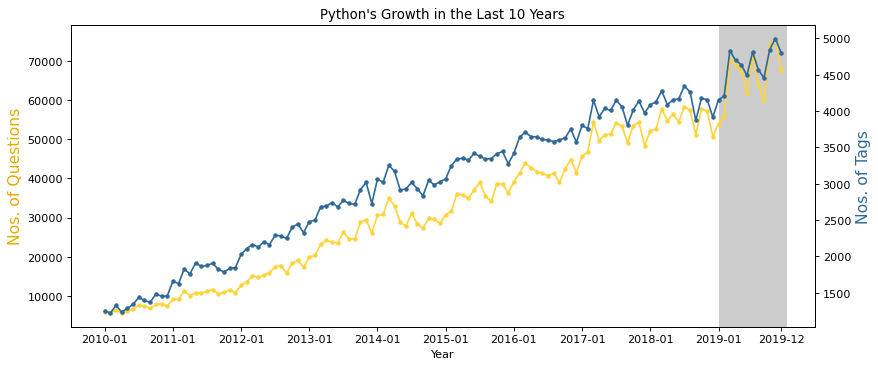

In [3]:
df_month = pd.read_csv("python_counts.csv").set_index("month")
fig, ax1 = plt.subplots(figsize=(12, 5), dpi=80)

ax2 = ax1.twinx()
ax1.plot(df_month.index, df_month['docs'], 'g-', marker='.', color='#FFD43B')
ax2.plot(df_month.index, df_month['tags'], 'b-', marker='.', color='#306998')

ax1.set_xlabel('Year')
ax1.set_ylabel('Nos. of Questions',
               color='#E1AD01',
               fontsize=14)
ax1.set_xticks(np.append(np.arange(0, 120, 12), 119), [])
ax2.set_ylabel('Nos. of Tags', color='#306998', fontsize=14)

ax1.add_patch(
    patches.Rectangle(
        xy=(120-12, 0),  # point of origin.
        width=12, height=90000, linewidth=1, facecolor="grey", 
        fill=True, alpha=0.4))

plt.title("Python's Growth in the Last 10 Years")
plt.show()

<div align="center"> <h3 align="center"> Figure 1. Trend of Counts of Python Posts and Tags over Time</h3> </div>

From 2010 to 2019, Stack Overflow has accumulated roughly 4,117,394 questions tagged with the word Python. In *Figure 1*, we can observe that Python was averaging less than 10,000 questions in 2010. Yet, from this point onward, the number of questions continued to increase. It has been increasing at a constant rate since 2010 and has not lost momentum.  

Not only has the number of questions been increasing but also the number of tags. A total of 22,007 unique tags were obtained for the period of 2010 to 2019. Similar to the total number of questions, the number of tags have also followed an increasing trend. This means that the user base of python is not only getting larger but that the uses for python may also be getting more diverse because of the constant increase in tags that people use.

For this analysis, we will be focusing on 2019, the latest complete year available, as a representative of how Python is being utilized by Stack Overflow users at present by clustering posts within this year to common themes. 

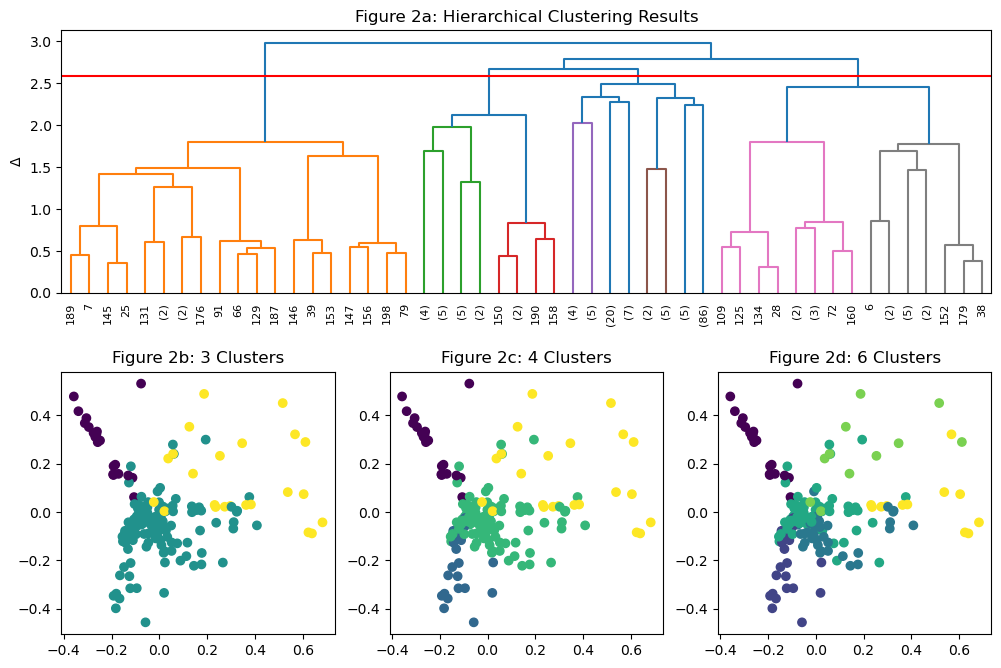

In [4]:
with open('kmeans_clustering.pkl', 'rb') as file_kx:
    kx_dct = pickle.load(file_kx)
    Kx = kx_dct['centers']
    Kx_mapping = kx_dct['mapping']
    

Z = linkage(Kx, method='ward', optimal_ordering=True)
y_predict = fcluster(Z, t=2.58, criterion='distance')

fig = plt.figure(figsize=(12, 8), dpi=100)
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, 1])
ax4 = fig.add_subplot(gs[-1, 2])

dendo = dendrogram(Z, truncate_mode='level', p=5, ax=ax1)
ax1.set_ylabel(r'$\Delta$')
ax1.axhline(y=2.58, c='r')
ax1.set_title('Figure 2a: Hierarchical Clustering Results')

y_predict = fcluster(Z, t=2.7, criterion='distance')
X_res_new = PCA(n_components=2, random_state=1337).fit_transform(Kx)
ax2.scatter(X_res_new[:,0], X_res_new[:,1], c=y_predict)
ax2.set_title('Figure 2b: 3 Clusters')

y_predict = fcluster(Z, t=2.58, criterion='distance')
ax3.scatter(X_res_new[:,0], X_res_new[:,1], c=y_predict)
ax3.set_title('Figure 2c: 4 Clusters')

y_predict = fcluster(Z, t=2.4, criterion='distance')
ax4.scatter(X_res_new[:,0], X_res_new[:,1], c=y_predict)
ax4.set_title('Figure 2d: 6 Clusters')



plt.subplots_adjust(hspace=0.3)
plt.show()

<div align="center"> <h3 align="center"> Figure 2. Clustering Results using Ward's Method</h3> </div>

A two-step clustering approach was used to identify the clusters. From the 200 centroids derived from the initial K-means Clustering, Agglomerative Hierarchical Clustering using Ward's Method was used to identify the final clusters. Different delta values were explored to arrive at the optimum number of clusters. Our group decided to proceed with 4 clusters at *delta=2.58* after comparing different results visually.  

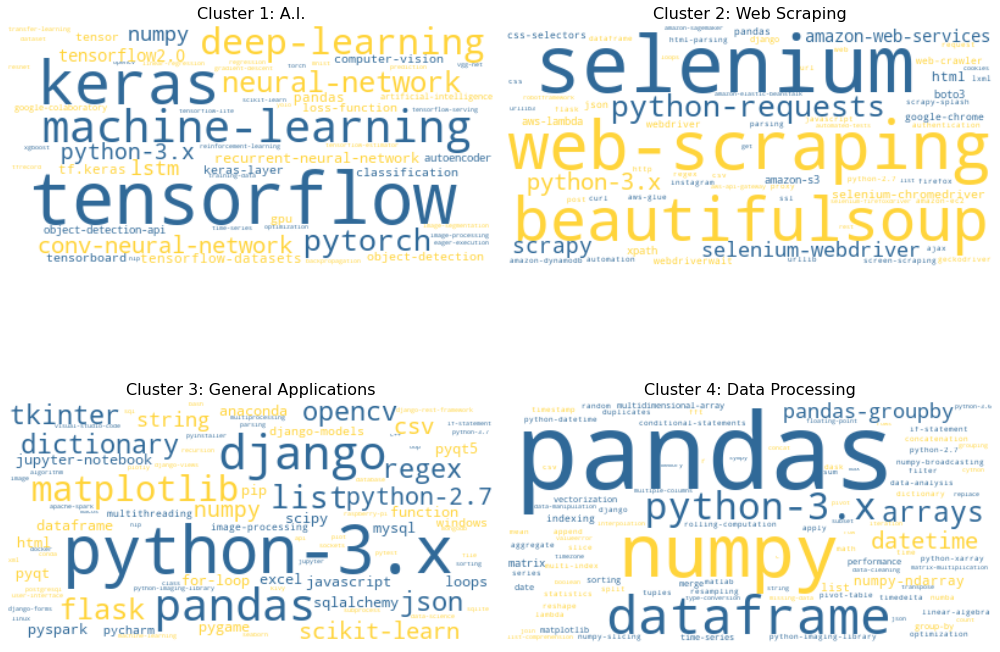

In [5]:
df = pd.read_csv("clustered_data.csv")

def clouds(df):
    """Creates a wordcloud for each cluster in the dataframe"""
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    axs = axs.ravel()

    CustomCmap = matplotlib.colors.ListedColormap(['#FFD43B', '#306998'])
    cl_labels = ['A.I.', 'Web Scraping', 
                 'General Applications', 'Data Processing']

    for i, label in enumerate(df.Cluster.unique()):
        cluster = (df[df.Cluster == label]['Tags-2'].value_counts()[1:]
                                                    .to_dict())

        wordcloud = WordCloud(background_color="white",
                              min_font_size=5,
                              colormap=CustomCmap,
                              prefer_horizontal=1).generate_from_frequencies(
                                                    frequencies=cluster)
        axs[label-1].imshow(wordcloud, interpolation='bilinear')
        axs[label-1].set_title('Cluster '+str(label)+": "+cl_labels[label-1],
                               fontsize=16)
        axs[label-1].axis("off")
    plt.tight_layout()
    return plt.show()

clouds(df)

<div align="center"> <h3 align="center"> Figure 3. Cluster Profile Based on Top Tags</h3> </div>

The four clusters identified in *Figure 2* were profiled based on the presence of tags that were associated with it as seen in the word clouds in *Figure 3*. We labeled Cluster 1 as the **AI Cluster**. In this cluster, the most common tags include tensorflow, machine-learning, keras, deep-learning, and neural-network which all pertains to tools that are used for artificial intelligence. Cluster 1 was the first cluster to separate from the rest showing that AI topics are more distinct compared to the rest of the Stack Overflow posts.  

Cluster 2 is labeled as the **Web Scraping Cluster** due to the presence of different scraping tools such as selenium, beutifulsoup, scrapy, and requests. In addition, we can also find the likes of HTML, CSS-selectors, JSON, and Amazon-web-service in this cluster further solidfying it as the Web Scraping cluster. Looking at *Figure 2a*, this group branched away from cluster 3 to form a more specialized grouped compared to the third cluster. 

Cluster 3 is the **General Applications Cluster**. This cluster involves a broad range of topics such as those pertaining to python versions namely, python-3.x, python-2.7; those pertaining to web frameworks such as django and flask; and those referring to python data types such as lists, strings, loops among others. This cluster is also the largest cluster containing 77% of all posts. 

Lastly, we have Cluster 4 which is the **Data Processing Cluster**. We can see here that Pandas, dataframe, and numpy are the most common tags. Included in the word cloud are matrix, arrays, and vectorization which are all used for data manipulation and analysis. This is the 2nd largest cluster, containing 12% of all posts, showing that next to the General Applications, most Stack Overflow users ask Data Processing related questions.

From these clusters, we can conclude that Stack Overflow posts can be segmented into groups that represents the main areas of usage for Python Stack Overflow users in 2019. 

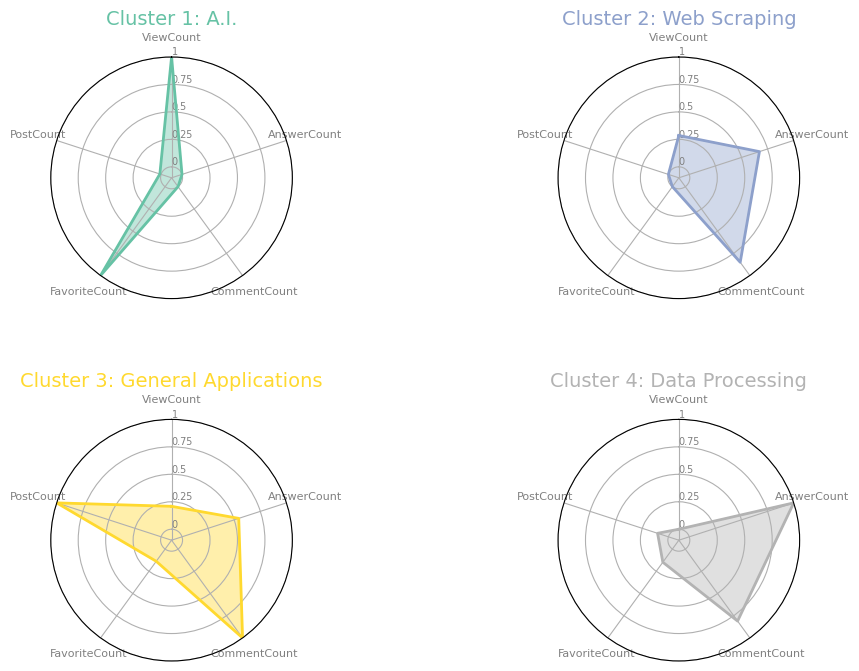

In [7]:
def make_spider(row, title, color):
    """Creates radar chart"""
 
    # number of variable
    categories=list(df_scaled)[1:]
    N = len(categories)
 
    # Angles
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(2, 2, row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.25, 0.5, 0.75, 1], [0, 0.25, 0.5,0.75, 1], 
               color="grey", size=7) #formmscaled
    plt.ylim(-0.1,1)

    # Ind1
    values=df_scaled.loc[row].drop('Cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)
    
    return ax;
    
# Read the data
df_scaled = pd.read_csv('cluster_metrics.csv').drop(columns=['Unnamed: 0'])

# Set plot size
plt.figure(figsize=(12, 8), dpi=100)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_scaled.index))

cl_labels = ['A.I.', 'Web Scraping', 
             'General Applications', 'Data Processing']

for row in range(0, len(df_scaled.index)):
    make_spider(row=row, 
                title='Cluster '+
                (df_scaled['Cluster'][row]).astype(str)+
                ": "+
                cl_labels[row], 
                color=my_palette(row))


<div align="center"> <h3 align="center"> Figure 4. Cluster Profile Based on Engagement Metrics</h3> </div>

Looking deeper into each cluster, we now want to understand how Stack Overflow users engage with the different clusters. *Figure 4* provides 5 different metrics scaled according to the minimum and maximum value with 1 meaning it has the highest count for that metric and 0 meaning it has the lowest count. 

Cluster 3, the **General Applications cluster**, as mentioned earlier, is the largest cluster containing the most number of posts. It not only has the most posts but the most number of comments as well. This is expected given the wide range of tags that can be included in cluster 3. However, despite the high number of posts and comments, it does not have the most number of answers nor views. This may mean that there are posts in this cluster that do not garner answers or even worse, are not seen at all. Hence, it may be worthy to analyze this cluster even further to see which posts are being answered and why. 

On the contrary, the award for most answers is given to Cluster 4, the **Data Processing Cluster**. Cluster 4, on average, receives 1.38 answers per post which is higher compared to the other clusters which averages at 1.015 answers per post. It, however, also has the lowest view counts. This is an interesting behavior since it may mean that fewer people see the posts but those that do are more likely to answer compared to the the other clusters. One possible reason is that there are more popular posts where people provide multiple alternative answers and less popular posts that are hardly viewed, potentially because they are duplicates of the other posts. 

Cluster 1, the **AI Cluster**, is another interesting cluster. Despite having the fewest answers and comments, has the most favorites and most views clustered. This may mean that there are multiple users who are interested in the posts but are not yet knowledgeable enough to answer or comment on what is asked. People studying the field of AI may be viewing and following the posts waiting for answers to come.

Lastly, Cluster 2, the **Web Scraping Cluster**, is steadily performing across the different metrics. It's has the least count of favorites but it does have a healthy amount of views, answers, and comments which may mean that people going through this posts are generous to provide their answers and comments. 

## Conclusion

Python is a language that has been rapidly growing within the past decade. In Stack Overflow, it is not only the number of Python users that has grown but also the number of tags that are associated with Python. This shows that Python continues to diversify as language for different uses. It is thus understandable for Python Stack Overflow posts to form clusters of specializations. In this analysis, we were able to identify four clusters: the AI Cluster, the Web Scraping Cluster, the General Applications Cluster, and the Data Processing Cluster. Each of these clusters contains Python packages and libraries that assist the user with their specific need. 

Within each cluster, Stack Overflow user behavior also varies. The General Applications Cluster are the most active in terms of making new content, posting and commenting as much as they can. This cluster is bulk of Python Stack Overflow users. On the opposite end, we have the AI Clusters – the lurkers – who are viewing and marking as favorite the posts without providing additional content. We also have the helpful Data Processing Cluster who only view select posts but make sure to leave an answer when they do. And then we have the steady Web Scraping Cluster who has an average number of views, comments, and answers on their niche topic.

It is important for Stack Overflow to keep track of these growing sub-communities within the Python users of their platform. In doing so, they are allowing themselves to continue to be relevant to different users of their platform who are exhibiting different behaviors. Python is expanding beyond developers to data scientists and other industry practitioners as well. Stack Overflow should recognize this shift in their customer base and adjust their features accordingly to truly make them the go-to place for beginner and experienced programmers.


## Recommendations

This analysis was able to uncover multiple recommendations both for Stack Overflow and for the researchers. 

For Stack Overflow, it is important to ensure that their platform is able to sustain the quality assistance it currently does to various programmers. This can be done by catering to the different needs of each cluster.
- For Cluster 1, the AI Cluster, Stack Overflow can extend the posts to the statistics and the machine learning Stack Exchange to allow for more experts to answer the questions raised. 
- For Cluster 2, the Web Scraping Cluster, the goal is to maintain its community of scrapers that posts, comments, and answers each other’s questions. 
- For Cluster 3, the General Applications Cluster, this needs to be further divided into sub-clusters to be able to identify which topics are less answered compared to the rests. Stack Overflow can also explore ways to merge similar questions given the high volume of posts available in this cluster to increase engagement per post. 
- Lastly, for Cluster 4, the Data Processing Cluster, further exploration can be done to assess the cause of the low view count. In the event that this is due to duplication of posts that causes the duplicates to not be seen, then a similar strategy recommended to cluster 3 can be conducted wherein similar posts are merged with one another. This allows for the already active community for the Data Processing Cluster to be even more active in engaging with one another. 

For the researchers, this study serves as an initial step in profiling Python related posts found in Stack Overflow. In general, further analysis needs to be done to be able to fully understand the intricacies of each cluster. In addition to the busines applications mentioned above, the analysis can still be improved through:
- Extending the analysis to post titles and content and not just tags, 
- Exploring other non-representative-based and non-hierarchical-based models to see improvements in the groupings,
- Performing statistical tests to quantify differences in cluster. 



## Acknowledgement and References
[1] About Python | Python Institute. (n.d.). Python Institute. Retrieved September 13, 2021, from https://pythoninstitute.org/what-is-python/

[2] Stack Overflow company page - learn about stack overflow. (n.d.). Stack Overflow. Retrieved September 13, 2021, from https://stackoverflow.com/company